# 1. ライブラリのインポート

In [26]:
# 初めて実行するときは以下をコメントアウトして実行してください
# !pip install streamlit

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hiragino Sans' #日本語フォントを指定（Mac）
# plt.rcParams['font.family'] = 'MS Gothic' #日本語フォントを指定（Windows）

import streamlit as st


# 2. データのインポート

In [9]:
df = pd.read_csv('./data.csv')

# 3. データの確認

In [10]:
df.head().T # データの最初の5行を表示

,0,1,2,3,4
ケースID,CC52120,CC52122,CC52124,CC52126,CC52127
日時,2019-01-01 07:56:58,2019-01-01 08:05:10,2019-01-01 08:44:32,2019-01-01 08:54:33,2019-01-01 08:56:58
顧客ID,C29793,C29794,C29795,C29796,C29797
年齢,62,61,58,58,72
性別,female,male,male,male,female
商品,prd_1,prd_1,prd_1,prd_1,prd_1
契約日時,2019-01-01 08:00:46,2019-01-01 08:09:32,2019-01-01 08:45:42,2019-01-01 08:58:46,2019-01-01 08:59:29
キャンセル日時,NaN,NaN,NaN,NaN,NaN
商品名,annual_subscription,annual_subscription,annual_subscription,annual_subscription,annual_subscription
価格,1200,1200,1200,1200,1200


# 4. データの前処理

In [11]:
# # 年代列を追加
df['年代'] = df['年齢'] // 10 # 10で割って、小数点以下を切り捨てる（10の位の値を取得）
df['年代'] = df['年代'] * 10 # 10を掛ける
df['年代'] = df['年代'].astype(str) # 文字列に変換する
df['年代'] = df['年代'] + '代' # 代という文字を付け足す

# # 年、月の列を追加
# 年
df['年'] = None # 年の列を作成する（一時的にカラにしておく）
df['年'] = df['日時'].str[:4] # .strで指定列の文字の値を取得する ⇨ [:4]で左から4文字目までの値を取得する
df['年'] = df['年'] + '年' # 年という文字を付け足す

# 月
df['月'] = None # 月の列を作成する（一時的にカラにしておく）
df['月'] = df['日時'].str[5:7] # .strで指定列の文字の値を取得する ⇨ [5:7]で左から5~6文字目までの値を取得する(「まで」は指定したい数の一つ上の数字を記載する)
df['月'] = df['月'] + '月' # 月という文字を付け足す

# # レコード集計用の列を追加
df['件数'] = 1

# 5. グラフを作成

In [33]:
import matplotlib.pyplot as plt
import streamlit as st

def draw_card(df):
    title = 'カスタマサポート対応件数'
    value = df['件数'].sum()

    fig = plt.figure(figsize=(4, 2))  # 図の作成
    fig.patch.set_facecolor('#0017C1')  # 背景色を設定
    plt.axis('off')  # 軸を非表示

    # タイトルテキスト
    plt.text(
        0.5, 0.8, title,
        ha='center',
        fontsize=14,
        color='white'
    )

    # 数値テキスト
    plt.text(
        0.5, 0.5, f"{value:,}",
        ha='center',
        va='center',
        fontsize=28,
        color='white'
    )

    return fig

# 実行部分（Streamlit側）
fig = draw_card(df)
st.pyplot(fig)


2025-05-12 06:13:55.162 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 06:13:55.236 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-12 06:13:55.331 
  command:

    streamlit run /Users/sawayanagidaisuke/Desktop/Daisuke/2nd_work/customer_analysis/.00_venv/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-12 06:13:55.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

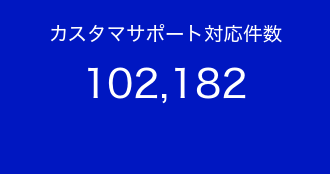

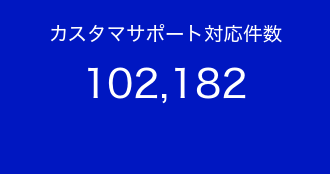

In [34]:
import matplotlib.pyplot as plt

def draw_card(df):
    title = 'カスタマサポート対応件数'
    value = df['件数'].sum()

    fig = plt.figure(figsize=(4, 2))
    fig.patch.set_facecolor('#0017C1')
    plt.axis('off')

    plt.text(
        0.5, 0.8, title,
        ha='center',
        fontsize=14,
        color='white'
    )

    plt.text(
        0.5, 0.5, f"{value:,}",
        ha='center',
        va='center',
        fontsize=28,
        color='white'
    )

    return fig

fig = draw_card(df)
plt.show()

2025-05-12 06:12:20.732 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


AttributeError: 'Text' object has no attribute 'savefig'